In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../my_pkgs'))


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from plot_pkg.plot_utils import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test_std = scaler.transform(X_test)
X_train_std = scaler.transform(X_train)
X_combined_std = np.vstack((X_test_std, X_train_std))
y_combined = np.hstack((y_test, y_train))

multi class method = ovr


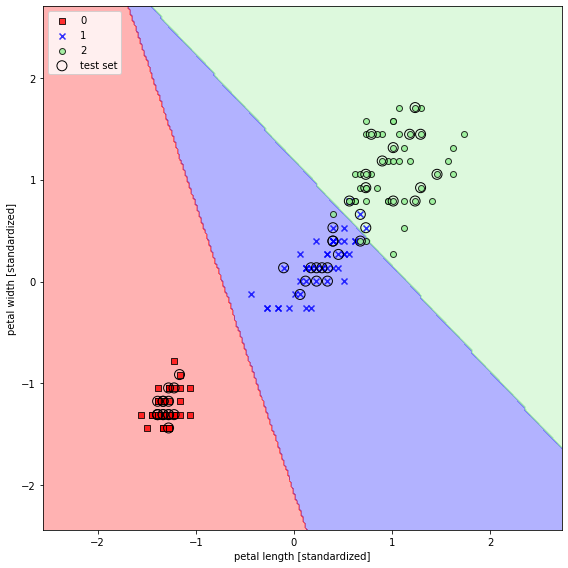

multi class method = multinomial


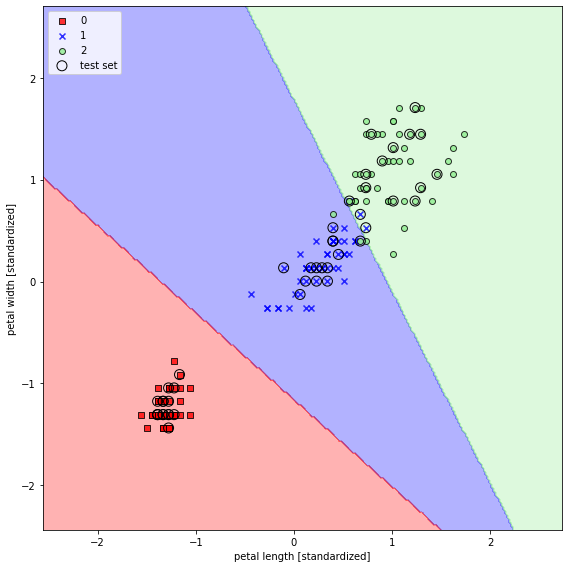

In [5]:
for multi_class_ in ['ovr', 'multinomial']:
    print(f'multi class method = {multi_class_}')
    lr = LogisticRegression(C=100.0, random_state=1,
                            solver='lbfgs', multi_class=multi_class_)
    lr.fit(X_train_std, y_train)
    plot_decision_regions(X=X_combined_std,
                            y=y_combined,
                            classifier=lr,
                            test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [6]:
# multiple predictions of probability of class
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [7]:
# multiple predictions of class
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [8]:
# single prediction of probability of class
example_index = 0
lr.predict_proba(X_test_std[example_index, :].reshape(1, -1)) # reshape(1, -1) is equivalent to reshape(1, 2) if the vector has 2 elements

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01]])